In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import collections
%matplotlib inline

## Answer Comment 3:

In [3]:
def get_degree_count_variance(G, weight):
    degree_sequence = sorted([d for n, d in G.degree(weight=weight)])
    degree_count = collections.Counter(degree_sequence)
    deg, cnt = zip(*degree_count.items())
    return deg, cnt, np.var(degree_sequence)

In [4]:
Alpha = nx.read_edgelist("datasets/BTC-Alpha", delimiter = ',', create_using=nx.DiGraph, data=(('weight', int),('sec', float),))

In [5]:
deg, cnt, var = get_degree_count_variance(Alpha, None)
deg_w, cnt_w, var_w = get_degree_count_variance(Alpha, 'weight')

In [20]:
print(np.mean(deg))
print(np.mean(deg_w))

111.7748344370861
117.67588932806323


In [82]:
print(var)
print(var_w)

1186.1873773547215
3693.421703268004


In [50]:
cnt

(395,
 1074,
 239,
 405,
 159,
 229,
 100,
 141,
 60,
 98,
 56,
 58,
 44,
 36,
 44,
 41,
 33,
 28,
 28,
 29,
 20,
 22,
 17,
 17,
 14,
 17,
 20,
 12,
 10,
 17,
 15,
 11,
 7,
 9,
 9,
 6,
 11,
 8,
 6,
 6,
 3,
 7,
 5,
 3,
 8,
 5,
 1,
 6,
 3,
 3,
 4,
 3,
 2,
 3,
 4,
 2,
 4,
 3,
 5,
 7,
 4,
 2,
 2,
 4,
 3,
 4,
 4,
 3,
 3,
 1,
 1,
 2,
 2,
 4,
 2,
 2,
 1,
 3,
 5,
 2,
 1,
 2,
 3,
 2,
 2,
 1,
 3,
 3,
 2,
 1,
 3,
 2,
 2,
 2,
 1,
 2,
 1,
 4,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1)

In [65]:
# degree exponent 1.8
deg_pow = []
for d in deg:
    deg_pow.append(10 **4 *d ** (-1.8))
deg_pow

[10000.0,
 2871.7458874925874,
 1384.1454884616858,
 824.6924442330588,
 551.8918645844859,
 397.49141141812646,
 301.17819624378615,
 236.83071351724968,
 191.58587332288388,
 158.48931924611134,
 133.50365836381636,
 114.14943260536289,
 98.83299717957458,
 86.49072464655282,
 76.38986344833238,
 68.01176275750969,
 60.98063487309055,
 55.01859438166676,
 49.916430119588426,
 45.514105075652004,
 41.68744415538648,
 38.3388581871505,
 35.39076050198217,
 32.78081636440631,
 30.45846301945405,
 28.38232531990098,
 26.51827222128618,
 24.837938280999182,
 23.317586890065968,
 21.93722762038688,
 20.679924606289884,
 19.531249999999996,
 18.47884864174066,
 17.512088741348485,
 16.621779629717533,
 15.799942215117431,
 15.039621157622475,
 14.334730291423918,
 13.679924715725466,
 13.070494407390912,
 12.502275302057017,
 11.971574631330801,
 11.475107954796632,
 11.009945833011095,
 10.573468485621351,
 10.163327092680241,
 9.777410646285496,
 9.413817458313353,
 9.070830589266054,
 8.

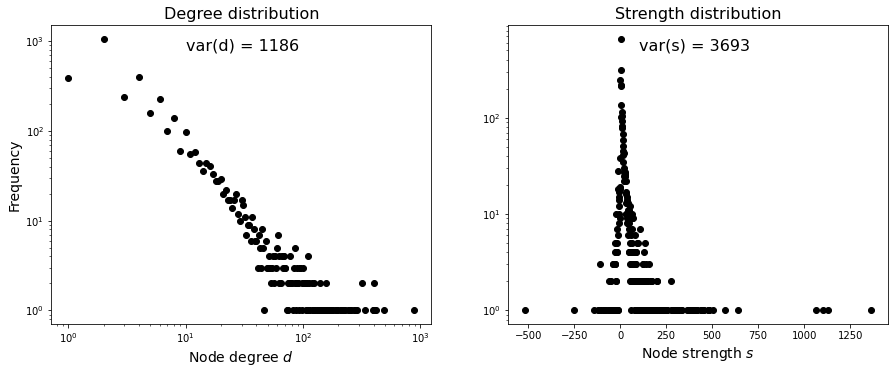

In [94]:
onepic, axes = plt.subplots(1,2,figsize=(15,5.5))
axes[0].scatter(deg, cnt, color='black')
#axes[0].scatter(deg, deg_pow)
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_title("Degree distribution", fontsize=16)
axes[0].set_ylabel("Frequency", fontsize=14)
axes[0].set_xlabel("Node degree $d$", fontsize=14)
axes[0].annotate("var(d) = 1186", xy = (10, 800), xytext=(10, 800), fontsize = 16)

axes[1].scatter(deg_w, cnt_w, color='black')
axes[1].set_yscale('log')
axes[1].set_title("Strength distribution", fontsize=16)
#axes[1].set_ylabel("Frequency", fontsize=12)
axes[1].set_xlabel("Node strength $s$", fontsize=14)
axes[1].annotate("var(s) = 3693", xy = (100, 50), xytext=(100, 500), fontsize = 16)
plt.savefig('case_study_degree_distribution.pdf')

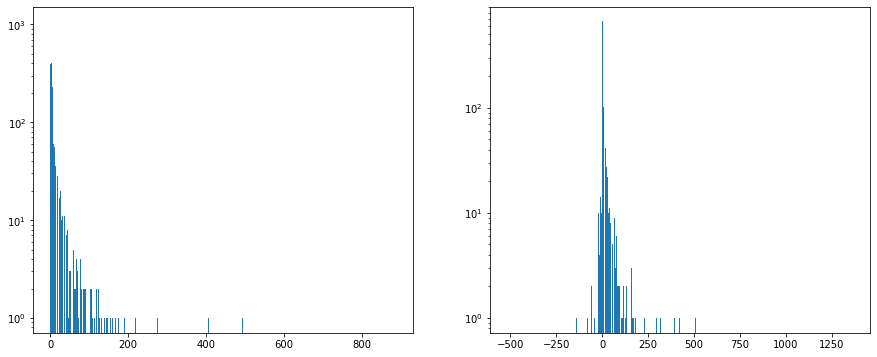

In [14]:
onepic, axes = plt.subplots(1,2,figsize=(15,6))
axes[0].bar(deg, cnt)
axes[0].set_yscale('log')


axes[1].bar(deg_w, cnt_w)
axes[1].set_yscale('log')

In [3]:
Ce = nx.closure(Alpha)
Ce_weighted = nx.closure(Alpha, weight = 'weight')

In [4]:
alpha_ce_wce_df = nx.get_ce_wce_df(Alpha)

In [5]:
degree_ce = dict()
for k, v in Ce.items():
    #if v > 0:    #remove 0, in order to use log
    degree_ce[k] = [Alpha.degree(k), v[0]]
print(len(degree_ce))
        
# 1 and -1 to assign color in scatter plot
degree_ce_weight = dict()   
for k, v in Ce_weighted.items():
    if v[0] >= 0:     
        degree_ce_weight[k] = [Alpha.degree(k, 'weight'), v[0], 1]  # delete/add 'weight' to compare with degree
    else:
        degree_ce_weight[k] = [Alpha.degree(k, 'weight'), v[0], -1]  # delete/add 'weight' to compare with degree
print(len(degree_ce_weight))

degree_ce_weight_negative = dict()   
for k, v in Ce_weighted.items():
    if v[0] < 0:
        degree_ce_weight_negative[k] = [Alpha.degree(k, 'weight'), v[0]]   # delete/add 'weight' to compare with degree
print(len(degree_ce_weight_negative))

degree_ce_weight_high = dict()   
for k, v in Ce_weighted.items():
    if v[0] > 0.25:
        degree_ce_weight_high[k] = [Alpha.degree(k, 'weight'), v[0]]   # delete/add 'weight' to compare with degree
print(len(degree_ce_weight_high))

3783
3783
137
8


In [6]:
print(nx.average_normalized_patterns_app(Alpha))
print(nx.average_normalized_patterns_app(Alpha,degree_ce_weight_negative.keys()))
print(nx.average_normalized_patterns_app(Alpha,degree_ce_weight_high.keys()))

[0.23283896947355412, 0.24803236071159152, 0.28830032859878996, 0.2308283412160645]
[0.20152129359058624, 0.24608136950881862, 0.3197789591134885, 0.23261837778710664]
[0.3540592332267357, 0.2510524486304413, 0.18719835679706054, 0.20768996134576237]


In [7]:
degree_ce_list = []
for key, value in degree_ce.items():
    temp = [key, value[0], value[1]]
    degree_ce_list.append(temp)
degree_ce_list = sorted(degree_ce_list, key=lambda t:t[2])

degree_ce_weight_list = []
for k, v in degree_ce_weight.items():
    temp = [k, v[0], v[1], v[2]]
    degree_ce_weight_list.append(temp)
degree_ce_weight_list = sorted(degree_ce_weight_list, key=lambda t:t[2], reverse=True)

degree_ce_negative_list = []
for key, value in degree_ce_weight_negative.items():
    temp = [key, value[0], value[1]]
    degree_ce_negative_list.append(temp)
degree_ce_negative_list = sorted(degree_ce_negative_list, key=lambda t:t[2])

#degree_ce_weight_high = degree_ce_weight_list[0:15]
degree_ce_high_list = []
for key, value in degree_ce_weight_high.items():
    temp = [key, value[0], value[1]]
    degree_ce_high_list.append(temp)
degree_ce_high_list = sorted(degree_ce_high_list, key=lambda t:t[2])

In [8]:
df_degree_ce = pd.DataFrame(degree_ce_list, columns=['node-id','degree', 'clo'])
df_degree_ce_weighted = pd.DataFrame(degree_ce_weight_list, columns=['node-id','strength', 'clo', 'sign'])
df_degree_ce_negative = pd.DataFrame(degree_ce_negative_list, columns=['node-id','strength', 'clo'])
df_degree_ce_high = pd.DataFrame(degree_ce_high_list, columns=['node-id','strength', 'clo'])

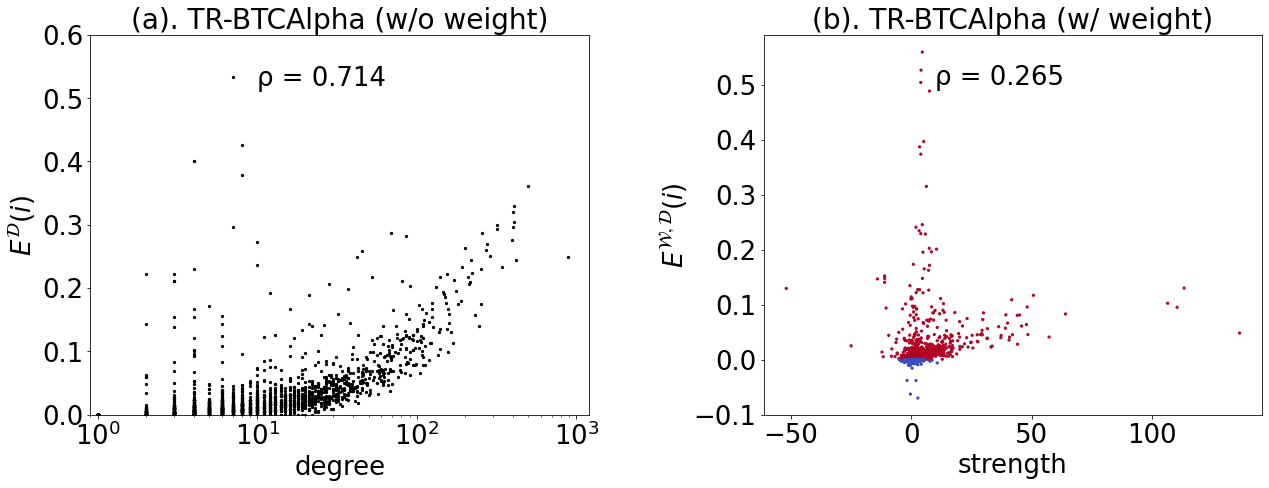

In [9]:
onepic, axes = plt.subplots(nrows=1,ncols=2,figsize=(21,7))
plt.subplots_adjust(wspace=0.35)  
fig = df_degree_ce.plot(kind="scatter", x = 'degree', y = 'clo',ax=axes[0], logx=True, s=5, c='Black')
fig.set_xlabel("degree", fontsize=26)
fig.set_ylabel("$E^\mathcal{D}(i)$", fontsize=26)
fig.set_title("(a). TR-BTCAlpha (w/o weight)", fontsize=28)
fig.set_xlim(0.9, 1200)
fig.set_ylim(-0.001, 0.6)
fig.tick_params(axis = 'x', labelsize = 26)
fig.tick_params(axis = 'y', labelsize = 26)
fig.annotate("ρ = 0.714", xy = (10, 0.52), xytext=(10, 0.52), fontsize = 26)
#fig.annotate("degree", xy = (100, 0.015), xytext=(100, 0.015), fontsize = 28)

fig_weight = df_degree_ce_weighted.plot(kind = 'scatter', x = 'strength', y = 'clo', ax=axes[1], s=5, c='sign', colormap='coolwarm', colorbar=False)
fig_weight.set_xlabel("strength", fontsize=26)
fig_weight.set_ylabel("$E^\mathcal{W,D}(i)$", fontsize=26)
fig_weight.tick_params(axis = 'x', labelsize = 26)
fig_weight.tick_params(axis = 'y', labelsize = 26)
fig_weight.set_title("(b). TR-BTCAlpha (w/ weight)", fontsize=28)
fig_weight.annotate("ρ = 0.265", xy = (10, 0.50), xytext=(10, 0.50), fontsize = 26)
#fig_weight.annotate("strength", xy = (15, -0.085), xytext=(15, -0.085), fontsize = 28)

plt.savefig('alpha.pdf')
plt.savefig('alpha.eps')
plt.savefig('alpha.png')

Three observations
1. highly trusted group are only formed with small circle
2. nodes with big strength, is better then average
3. very small number of negative triangle, and not too low.

In [10]:
print(df_degree_ce.corr(method='pearson'))
print(df_degree_ce_weighted.corr(method='pearson'))

          degree       clo
degree  1.000000  0.713975
clo     0.713975  1.000000
          strength       clo      sign
strength  1.000000  0.264943  0.030720
clo       0.264943  1.000000  0.066753
sign      0.030720  0.066753  1.000000


In [25]:
print(alpha_ce_wce_df.corr(method='pearson'))

                   closure  weighted-closure
closure           1.000000          0.509839
weighted-closure  0.509839          1.000000
